## 1. Google Play Store apps and reviews
<p>Las aplicaciones m√≥viles est√°n en todas partes. Son f√°ciles de crear y pueden resultar muy lucrativas. Debido a estos dos factores, se est√°n desarrollando cada vez m√°s aplicaciones. En este ejercicio, haremos un an√°lisis completo del mercado de aplicaciones de Android comparando m√°s de diez mil aplicaciones en Google Play en diferentes categor√≠as. Buscaremos informaci√≥n valiosa en los datos para dise√±ar estrategias que impulsen el crecimiento y la retenci√≥n.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Tenemos dos fuentes de datos:</p>
<ul>
<li><code>apps.csv</code>: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 caracter√≠sticas que describen una aplicaci√≥n determinada.</li>
<li><code>user_reviews.csv</code>: contiene 100 rese√±as para cada aplicaci√≥n, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">reviews</a>. El texto de cada rese√±a se ha procesado previamente y se le atribuyen tres caracter√≠sticas nuevas: Sentimiento (positivo, negativo o neutral), Polaridad del sentimiento y Subjetividad del sentimiento..</li>
</ul>

In [ ]:
# Importa las librer√≠as de pandas y matplotlin
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importa el datase apps.csv
apps = pd.read_csv('apps.csv')
apps

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9656                             Parkinson Exercices FR              MEDICAL   
9657                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews  Size     Installs  Type Price Content Rating  \
0        4.1      159  19.0      10,000+  Free     0       Everyone   
1        3.9      967  14.0     500,000+  Free     0       Everyone   
2        4.7    87510   8.7   5,000,000+  Free     0       Everyone   
3        4.5   215644  25.0  50,000,000+  Free     0           Teen   
4        4.3      967   2.8     100,000+  Free     0       Everyone   
...      ...      ...   ...          ...   ...   ...            ...   
9654     4.5       38  53.0       5,000+  Free     0       Everyone   
9655     5.0        4   3.6         100+  Free     0       Everyone   
9656     NaN        3   9.5       1,000+  Free     0       Everyone   
9657     4.5      114   NaN       1,000+  Free     0     Mature 17+   
9658     4.5   398307  19.0  10,000,000+  Free     0       Everyone   

                         Genres      Last Updated         Current Ver  \
0                  Art & Design   January 7, 2018               1.0.0   
1     Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                  Art & Design    August 1, 2018               1.2.4   
3                  Art & Design      June 8, 2018  Varies with device   
4       Art & Design;Creativity     June 20, 2018                 1.1   
...                         ...               ...                 ...   
9654                  Education     July 25, 2017                1.48   
9655                  Education      July 6, 2018                   1   
9656                    Medical  January 20, 2017                   1   
9657          Books & Reference  January 19, 2015  Varies with device   
9658                  Lifestyle     July 25, 2018  Varies with device   

             Android Ver  
0           4.0.3 and up  
1           4.0.3 and up  
2           4.0.3 and up  
3             4.2 and up  
4             4.4 and up  
...                  ...  
9654          4.1 and up  
9655          4.1 and up  
9656          2.2 and up  
9657  Varies with device  
9658  Varies with device  

[9659 rows x 13 columns]

In [9]:
# Borra todos los duplicados del dataset
apps.drop_duplicates()

apps.dropna(inplace = True)
apps

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9651                                        Chemin (fr)  BOOKS_AND_REFERENCE   
9652                                      FR Calculator               FAMILY   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews  Size     Installs  Type Price Content Rating  \
0        4.1      159  19.0      10,000+  Free     0       Everyone   
1        3.9      967  14.0     500,000+  Free     0       Everyone   
2        4.7    87510   8.7   5,000,000+  Free     0       Everyone   
3        4.5   215644  25.0  50,000,000+  Free     0           Teen   
4        4.3      967   2.8     100,000+  Free     0       Everyone   
...      ...      ...   ...          ...   ...   ...            ...   
9651     4.8       44   0.6       1,000+  Free     0       Everyone   
9652     4.0        7   2.6         500+  Free     0       Everyone   
9654     4.5       38  53.0       5,000+  Free     0       Everyone   
9655     5.0        4   3.6         100+  Free     0       Everyone   
9658     4.5   398307  19.0  10,000,000+  Free     0       Everyone   

                         Genres      Last Updated         Current Ver  \
0                  Art & Design   January 7, 2018               1.0.0   
1     Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                  Art & Design    August 1, 2018               1.2.4   
3                  Art & Design      June 8, 2018  Varies with device   
4       Art & Design;Creativity     June 20, 2018                 1.1   
...                         ...               ...                 ...   
9651          Books & Reference    March 23, 2014                 0.8   
9652                  Education     June 18, 2017               1.0.0   
9654                  Education     July 25, 2017                1.48   
9655                  Education      July 6, 2018                   1   
9658                  Lifestyle     July 25, 2018  Varies with device   

             Android Ver  
0           4.0.3 and up  
1           4.0.3 and up  
2           4.0.3 and up  
3             4.2 and up  
4             4.4 and up  
...                  ...  
9651          2.2 and up  
9652          4.1 and up  
9654          4.1 and up  
9655          4.1 and up  
9658  Varies with device  

[7021 rows x 13 columns]

In [17]:
# Imprime el total de apps que se van a analizar que quedan (dimensi√≥n)
print('Total number of apps in the dataset = ', len(apps))

Total number of apps in the dataset =  7021


In [23]:
# Imprime la est√°distica descriptiva de resumen
print(apps.describe())

            Rating       Reviews         Size
count  7021.000000  7.021000e+03  7021.000000
mean      4.160704  1.448960e+05    21.767597
std       0.559241  1.024428e+06    22.731237
min       1.000000  1.000000e+00     0.000000
25%       4.000000  8.400000e+01     4.900000
50%       4.300000  1.546000e+03    13.000000
75%       4.500000  2.658700e+04    31.000000
max       5.000000  4.489172e+07   100.000000


In [33]:
# Vamos a echar un vistazo al DataFrame final
apps

App             Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                   Coloring book moana       ART_AND_DESIGN   
2     U Launcher Lite ‚Äì FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                 Sketch - Draw & Paint       ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                 ...                  ...   
9651                                        Chemin (fr)  BOOKS_AND_REFERENCE   
9652                                      FR Calculator               FAMILY   
9654                                   Sya9a Maroc - FR               FAMILY   
9655                   Fr. Mike Schmitz Audio Teachings               FAMILY   
9658      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

      Rating  Reviews  Size     Installs  Type Price Content Rating  \
0        4.1      159  19.0      10,000+  Free     0       Everyone   
1        3.9      967  14.0     500,000+  Free     0       Everyone   
2        4.7    87510   8.7   5,000,000+  Free     0       Everyone   
3        4.5   215644  25.0  50,000,000+  Free     0           Teen   
4        4.3      967   2.8     100,000+  Free     0       Everyone   
...      ...      ...   ...          ...   ...   ...            ...   
9651     4.8       44   0.6       1,000+  Free     0       Everyone   
9652     4.0        7   2.6         500+  Free     0       Everyone   
9654     4.5       38  53.0       5,000+  Free     0       Everyone   
9655     5.0        4   3.6         100+  Free     0       Everyone   
9658     4.5   398307  19.0  10,000,000+  Free     0       Everyone   

                         Genres      Last Updated         Current Ver  \
0                  Art & Design   January 7, 2018               1.0.0   
1     Art & Design;Pretend Play  January 15, 2018               2.0.0   
2                  Art & Design    August 1, 2018               1.2.4   
3                  Art & Design      June 8, 2018  Varies with device   
4       Art & Design;Creativity     June 20, 2018                 1.1   
...                         ...               ...                 ...   
9651          Books & Reference    March 23, 2014                 0.8   
9652                  Education     June 18, 2017               1.0.0   
9654                  Education     July 25, 2017                1.48   
9655                  Education      July 6, 2018                   1   
9658                  Lifestyle     July 25, 2018  Varies with device   

             Android Ver  
0           4.0.3 and up  
1           4.0.3 and up  
2           4.0.3 and up  
3             4.2 and up  
4             4.4 and up  
...                  ...  
9651          2.2 and up  
9652          4.1 and up  
9654          4.1 and up  
9655          4.1 and up  
9658  Varies with device  

[7021 rows x 13 columns]

## 2. Data cleaning
<p>Las cuatro variables con las que trabajaremos con m√°s frecuencia de ahora en adelante son <i>Installs</i>, <i>Size</i>, <i>Rating</i> y <i>Price</i>. La funci√≥n <code>info()</code> nos dice que las columnas <i>Installs</i> y <i>Price</i> son de tipo <code>object</code>, no son de tipo <code>int</code> o <code>float</code> como esperar√≠amos. Esto se debe a que la columna contiene algunos caracteres m√°s que solo [0,9] d√≠gitos. Idealmente, queremos que estas columnas fueran puramente num√©ricas<br>
<br>
Por lo tanto, ahora necesitamos limpiar nuestros datos. Espec√≠ficamente, los caracteres especiales <code>,</code> y <code>+</code> que se encuentran en la columna <i>Installs</i> y <code>$</code> que esta en la columna <i>Price</i>.</p>

<p>Aqu√≠ un link donde podr√°s ver un poco m√°s a detalle que es una <a href="https://www.freecodecamp.org/espanol/news/expresiones-lambda-en-python/">funci√≥n lambda</a>

In [37]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7021 non-null   object 
 1   Category        7021 non-null   object 
 2   Rating          7021 non-null   float64
 3   Reviews         7021 non-null   int64  
 4   Size            7021 non-null   float64
 5   Installs        7021 non-null   object 
 6   Type            7021 non-null   object 
 7   Price           7021 non-null   object 
 8   Content Rating  7021 non-null   object 
 9   Genres          7021 non-null   object 
 10  Last Updated    7021 non-null   object 
 11  Current Ver     7021 non-null   object 
 12  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 767.9+ KB


In [73]:
# Lista de caracteres a eliminar 
chars_to_remove = [',', '+', '$']

# Lista de las columnas a limpiar
cols_to_clean = ['Installs', 'Price']

# Loop para cada columna
for col in cols_to_clean:
    # Loop para cada caracter especial
    for char in chars_to_remove:
        # Reemplaza con una funci√≥n lambda el caracter especial por un texto vac√≠o ('')
        apps[col] = apps[col].apply(lambda x: str(x).replace(char, ''))
    # Convierte la columna a tipo flotante (float)
    apps[col] = apps[col].astype('float')

## 3. Exploring App's categories
<p>Con m√°s de mil millones de usuarios activos en 190 pa√≠ses de todo el mundo, Google Play sigue siendo una importante plataforma de distribuci√≥n para crear una audiencia global. Para que las empresas muestren sus aplicaciones a los usuarios, es importante hacerlas m√°s r√°pida y f√°cilmente visibles en Google Play. Para mejorar la experiencia de b√∫squeda general, Google ha introducido el concepto de agrupar aplicaciones en categor√≠as.</p>
<p>Esto nos lleva a las siguientes preguntas:</p>
<ul>
<li>¬øQu√© categor√≠a tiene la mayor participaci√≥n de aplicaciones (activas) en el mercado?</li>
<li>¬øAlguna categor√≠a espec√≠fica domina el mercado?</li>
<li>¬øQu√© categor√≠as tienen la menor cantidad de aplicaciones?</li>
</ul>
<p>Vamos a responder estas preguntas aqu√≠ <code>33</code> categor√≠as unicas estan presentas en nuestro dataset. Las apps de <em>Family</em> y <em>Game</em> tienen la mayor prevalencia del mercado. Curiosamente, <em>Tools</em>, <em>Business</em> y <em>Medical</em> tambi√©n est√°n en el top.</p>

Number of categories =  33


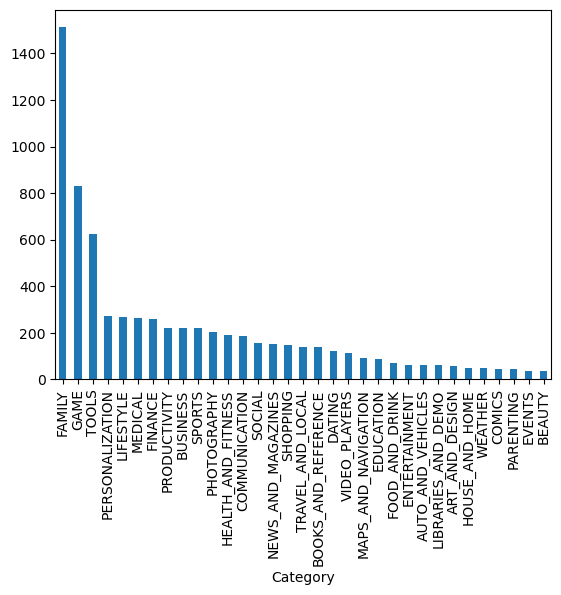

In [75]:
# Imprime el total de categor√≠as √∫nicas
num_categories = 33
print('Number of categories = ', num_categories)

# Cuenta el n√∫mero de aplicaciones en cada Categor√≠a y ordena de manera descendente 
num_apps_in_category = apps['Category'].value_counts()

# Muestra el resultado en una gr√°fica de barras
num_apps_in_category.plot(kind='bar')
plt.show()

## 4. Ratings Distribution
<p>Despu√©s de analizar la participaci√≥n de mercado para cada categor√≠a de las aplicaciones, veamos c√≥mo se posicionan de acuerdo a las calificaciones (en una escala del 1 al 5) las cuales afectan la imagen de la marca general de la empresa. Las calificaciones son un indicador clave de rendimiento de una aplicaci√≥n.</p>

Average app rating =  4.160703603475289


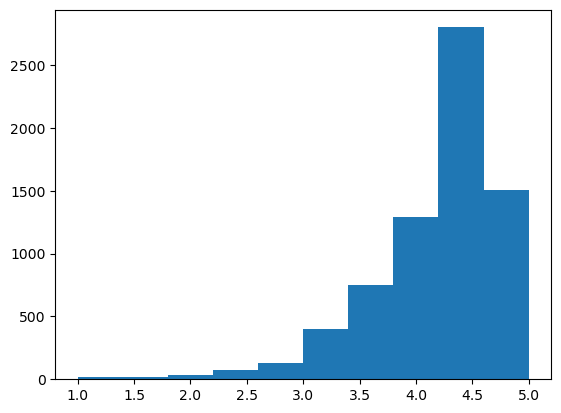

In [77]:
# Calcular el promedio de calificaci√≥n de las apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Calcula el promedio de calificaci√≥n por categor√≠a
avg_rating_by_category = apps.groupby('Category')['Rating'].mean()

# Visualiza en un histograma el comportamiento del Rating
plt.hist(apps['Rating'], bins = 10)
plt.show()

## 5. Size and Price
<p>Examinemos ahora el tama√±o y el precio de la aplicaci√≥n. En cuanto al tama√±o, si la aplicaci√≥n m√≥vil es demasiado grande, puede ser dif√≠cil y/o costoso para los usuarios descargarla. Los tiempos de descarga prolongados pueden desanimar a los usuarios incluso antes de que experimenten su aplicaci√≥n m√≥vil. Adem√°s, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. Por el precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o econ√≥micas. Estos problemas se agravan si el mercado objetivo es en pa√≠ses en v√≠as de desarrollo; especialmente debido a las velocidades de Internet, el poder adquisitivo, los tipos de cambio, etc.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>¬øEl tama√±o de una aplicaci√≥n afecta su calificaci√≥n?</li>
<li>¬øLos usuarios realmente se preocupan por las aplicaciones pesadas del sistema o prefieren las aplicaciones ligeras? </li>
<li>¬øEl precio de una aplicaci√≥n afecta su calificaci√≥n? </li>
<li>¬øLos usuarios siempre prefieren las aplicaciones gratuitas a las de paga?</li>
</ul>

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")

# Filtra filas donde los valores de 'Rating' y 'Size' no sean nulos
apps_with_size_and_rating_present = apps.dropna(subset = ['Rating', 'Size'])

# Filtra las categor√≠as con al menos 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

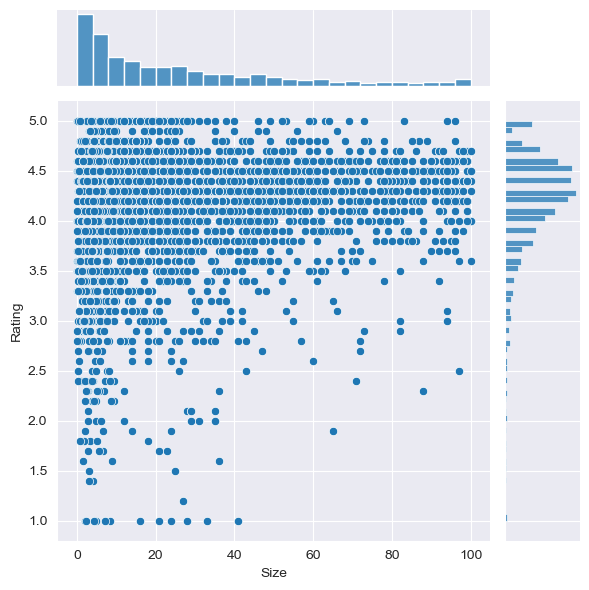

In [81]:
# Gr√°fica size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

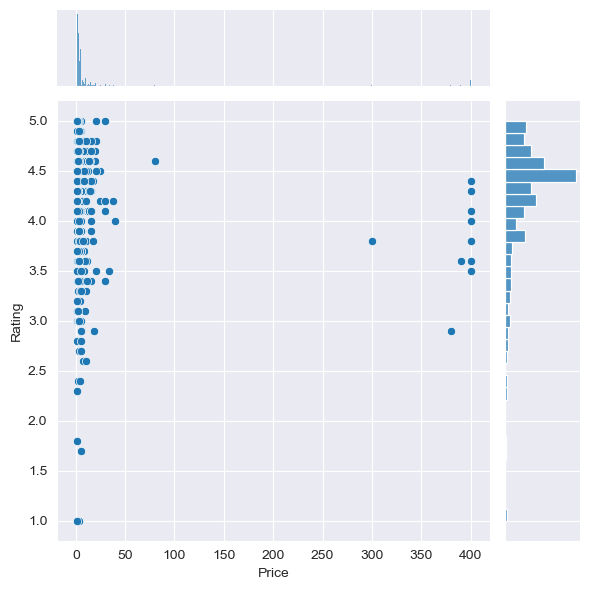

In [83]:
# Selecciona las apps de paga 'Type' = 'Paid'
paid_apps = apps[apps['Type'] == 'Paid']

# Grafica price vs. rating de las paplicaciones de paga
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])
plt.show()

## 6. Relation between Category & Price
<p>As√≠ que ahora viene la parte dif√≠cil. ¬øC√≥mo se supone que las empresas y los desarrolladores cubran sus cuotas de fin de mes? ¬øQu√© estrategias de monetizaci√≥n pueden utilizar las empresas para maximizar las ganancias? Los costos de las aplicaciones se basan en gran medida en las caracter√≠sticas, la complejidad y la plataforma. Hay muchos factores a considerar al seleccionar la estrategia de precios adecuada para las aplicaciones moviles. Es importante considerar la disposici√≥n de su cliente a pagar por la aplicaci√≥n. Un precio elevado puede hacer que los clientes no se vean atra√≠dos por descargarlaque ocurra la descarga o pueden eliminar una aplicaci√≥n que han descargado despu√©s de recibir demasiados anuncios o simplemente no obtener el valor que esperaban de su dinero.</p>

<p>Las diferentes categor√≠as exigen diferentes rangos de precios. Algunas aplicaciones que son simples y se usan a diario, como la aplicaci√≥n de calculadora, probablemente deber√≠an mantenerse gratuitas. Sin embargo, tendr√≠a sentido cobrar por una aplicaci√≥n m√©dica altamente especializada que diagnostica a pacientes diab√©ticos, as√≠ que vamos a descubrir y encontrar la respuesta</p>

Text(0.5, 1.0, 'App pricing trend across categories')

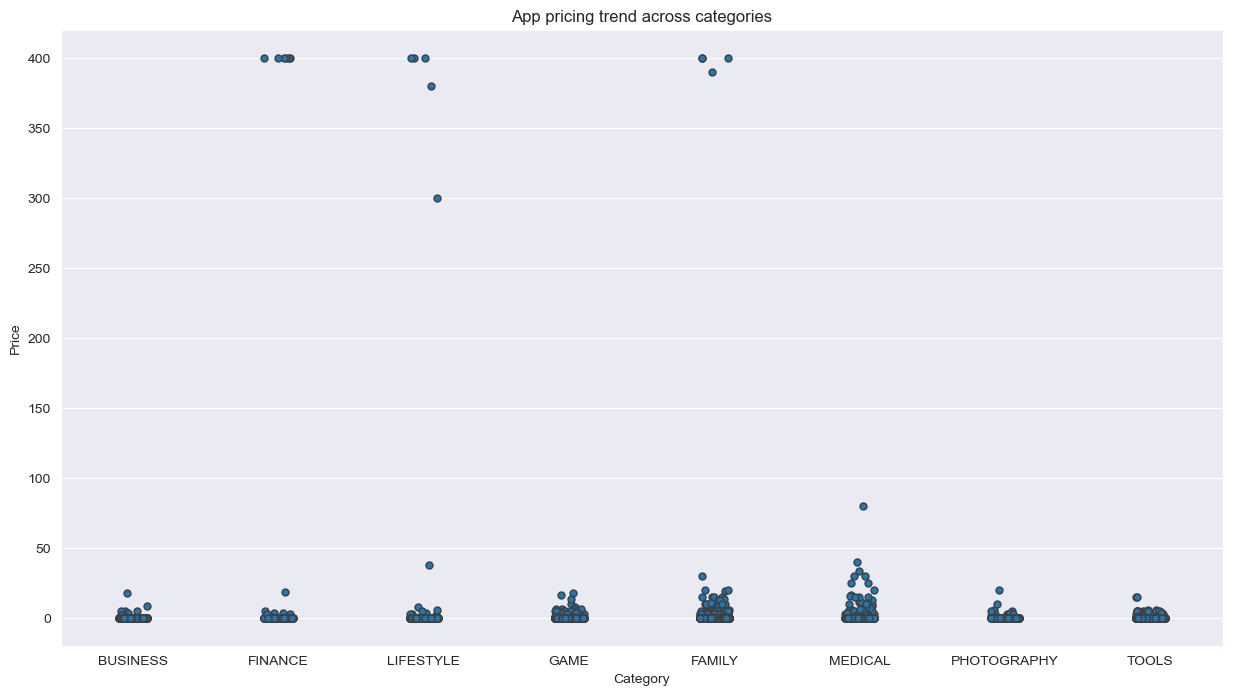

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Lista de categor√≠as populares
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examina la tendencia de precio graficando el Precio por Categor√≠a
ax = sns.stripplot(x = popular_app_cats['Category'], y = popular_app_cats['Price'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')


In [87]:
# Selecciona las apps con un precio mayor a 200
apps_above_200 = apps[apps['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Category                             App   Price
3327     FAMILY          most expensive app (H)  399.99
3465  LIFESTYLE                      üíé I'm rich  399.99
3469  LIFESTYLE        I'm Rich - Trump Edition  400.00
4396  LIFESTYLE                       I am rich  399.99
4398     FAMILY                  I am Rich Plus  399.99
4399  LIFESTYLE                   I am rich VIP  299.99
4400    FINANCE               I Am Rich Premium  399.99
4401  LIFESTYLE             I am extremely Rich  379.99
4402    FINANCE                      I am Rich!  399.99
4403    FINANCE              I am rich(premium)  399.99
4406     FAMILY                   I Am Rich Pro  399.99
4408    FINANCE  I am rich (Most expensive app)  399.99
4410     FAMILY                       I Am Rich  389.99
4413    FINANCE                       I am Rich  399.99
4417    FINANCE              I AM RICH PRO PLUS  399.99

## 7. Paid apps vs Free apps
<p>Para las aplicaciones de Play Store en la actualidad, existen cinco tipos de estrategias de precios: gratis, "freemium", de pago, "paymium" y de suscripci√≥n. Centr√©monos solo en aplicaciones gratuitas y de pago. 

Algunas caracter√≠sticas de las aplicaciones gratuitas son:</p>
<ul>
<li>Libres de descarga.</li>
<li>La principal fuente de ingresos a menudo proviene de la publicidad.</li>
<li>Por lo general son creadaa por empresas que tienen otros productos y la aplicaci√≥n sirve como una extensi√≥n de esos productos.</li>
<li>Puede servir como una herramienta para la retenci√≥n de clientes, la comunicaci√≥n y el servicio al cliente.</li>
</ul>
<p>Algunas caracter√≠sticas de las aplicaciones de paga son:</p>
<ul>
<li>Tienen un tiempo de servicio de prueba gratuito, esto para que el usuario pueda conocerla.</li>
<li>Ofrecen un servicio de mayor especialidad.</li>
</ul>
<p>¬øAdem√°s de esto que otras caracter√≠sticas diferenc√≠as a las aplicaciones de pago las aplicaciones gratuitas?</p>

In [99]:
print('las aplicaciones de pago normalmente no contienen publicidad')

las aplicaciones de pago normalmente no contienen publicidad


## 8. Sentiment analysis
<p>La miner√≠a de datos de rese√±as de usuarios para determinar c√≥mo se sienten las personas acerca de su producto, marca o servicio se puede realizar mediante una t√©cnica llamada an√°lisis de sentimientos. Las rese√±as de los usuarios de las aplicaciones se pueden analizar para identificar si el estado de √°nimo es positivo, negativo o neutral con respecto a esa aplicaci√≥n. Por ejemplo, las palabras positivas en la revisi√≥n de una aplicaci√≥n pueden incluir palabras como "asombroso", "amigable", "bueno", "excelente" y "amor". Las palabras negativas pueden ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p>

<p>¬øQu√© podemos decir acerca del analisis de sentimiento de las aplicaciones?</p>

In [91]:
# Carga el archivo user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")
reviews_df

App  \
0            10 Best Foods for You   
1            10 Best Foods for You   
2            10 Best Foods for You   
3            10 Best Foods for You   
4            10 Best Foods for You   
...                            ...   
64290  Houzz Interior Design Ideas   
64291  Houzz Interior Design Ideas   
64292  Houzz Interior Design Ideas   
64293  Houzz Interior Design Ideas   
64294  Houzz Interior Design Ideas   

                                                  Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
2                                                    NaN       NaN   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
...                                                  ...       ...   
64290                                                NaN       NaN   
64291                                                NaN       NaN   
64292                                                NaN       NaN   
64293                                                NaN       NaN   
64294                                                NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
0                    1.00                0.533333  
1                    0.25                0.288462  
2                     NaN                     NaN  
3                    0.40                0.875000  
4                    1.00                0.300000  
...                   ...                     ...  
64290                 NaN                     NaN  
64291                 NaN                     NaN  
64292                 NaN                     NaN  
64293                 NaN                     NaN  
64294                 NaN                     NaN  

[64295 rows x 5 columns]

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

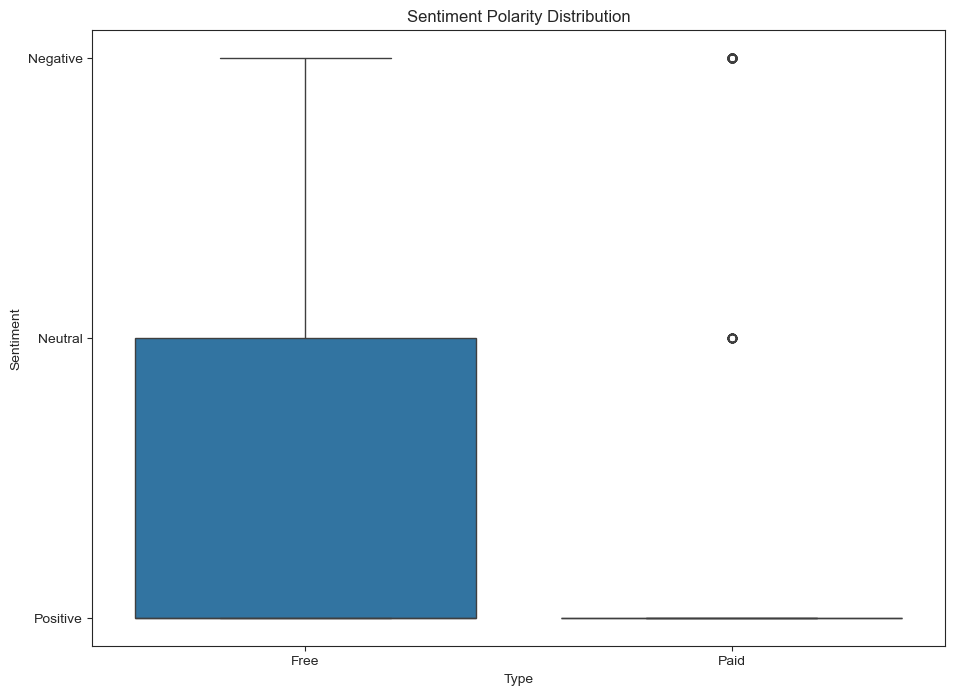

In [95]:
# Une los dos DataFrames (join)
merged_df = pd.merge(apps, reviews_df, on = "App")

# Elimina los valores nulos (NA) de las columnas Sentiment y Review
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

# Grafica la polaridad de sentimientos para apps gratuitas y de paga
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y = "Sentiment", data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

## 9. Conclusion
<p>En este cuaderno, analizamos m√°s de diez mil aplicaciones de Google Play Store. Podemos usar nuestros hallazgos para poder encontrar informaci√≥n valiosa por si alguna vez deseamos crear una aplicaci√≥n nosotros mismos. Espero que hayas disfrutado el curso!!! :)
    
Atte. <a href="https://www.linkedin.com/in/ivan-alducin-a87a71108/">Ivan Alducin</a></p>